### Feature selection
- Using inbuilt functions in sklearn

#### Univariate Selection
- We filter each feature by having the better relationship with o/p

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import chi2, SelectKBest

plt.style.use("dark_background")

#### Applying feature selection on a dataset predicting mobile price range

In [29]:
df = pd.read_csv("train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [30]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

We have 21 features, but we do not need all of them

In [31]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [32]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [33]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

Using the SelectKBest to select top 10 features

In [34]:
model = SelectKBest(score_func=chi2, k=10)

In [35]:
model.fit(X, y)

SelectKBest(score_func=<function chi2 at 0x10fe0cee0>)

In [36]:
model.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

These are the scores assigned to the features in order

In [37]:
features = np.hstack((np.array(X.columns).reshape(-1, 1), model.scores_.reshape(-1, 1)))
featuresScores = pd.DataFrame(features, columns=["Feature", "Score"])

In [38]:
featuresScores

,Feature,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.74582
8,mobile_wt,95.972863
9,n_cores,9.097556


Sorting them by scores

In [39]:
featuresScores.sort_values(by="Score", ascending=False)

,Feature,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.58675
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.2364
4,fc,10.135166
14,sc_h,9.614878


Now we can select the most important features

#### Feature Importance
- Tree based classifiers give us importance of a feature
- We can use this to select the best for our needs

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
model = RandomForestClassifier()

In [42]:
model.fit(X, y)

RandomForestClassifier()

In [43]:
model.feature_importances_

array([0.07393613, 0.00666163, 0.0275151 , 0.007103  , 0.02463013,
       0.0061598 , 0.03455893, 0.0233087 , 0.03715466, 0.0225515 ,
       0.02977493, 0.053472  , 0.05691481, 0.49108964, 0.02751356,
       0.02967297, 0.02949204, 0.00561601, 0.00643337, 0.00644111])

Here again we get the feature importances

In [44]:
featureImportance = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["Importance"])
featureImportance

,Importance
battery_power,0.073936
blue,0.006662
clock_speed,0.027515
dual_sim,0.007103
fc,0.024630
four_g,0.006160
int_memory,0.034559
m_dep,0.023309
mobile_wt,0.037155
n_cores,0.022551


In [45]:
featureImportance.sort_values(by="Importance", ascending=False)

,Importance
ram,0.491090
battery_power,0.073936
px_width,0.056915
px_height,0.053472
mobile_wt,0.037155
int_memory,0.034559
pc,0.029775
sc_w,0.029673
talk_time,0.029492
clock_speed,0.027515


This method again shows how important ram is, and is pretty consistent with Univariate filtering

#### Correlation matrix

In [47]:
corr = df.corr()
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


Here we get the correlation with every feature

In [62]:
price_corr = corr.iloc[-1, :]
price_corr = price_corr.sort_values(ascending=False).iloc[1:]

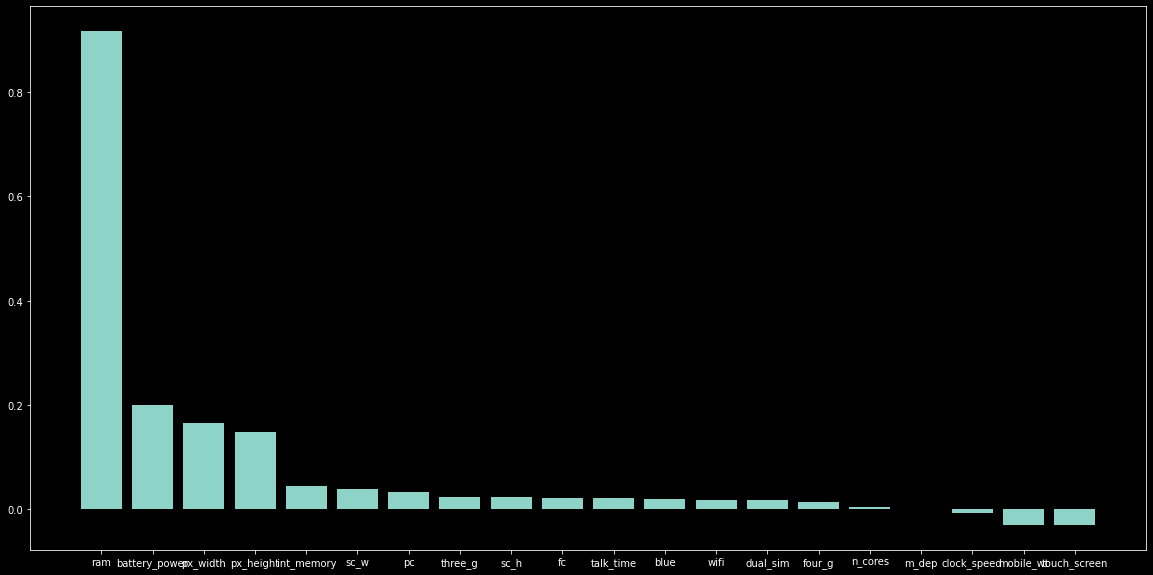

In [63]:
plt.figure(figsize=(20, 10))
plt.bar(price_corr.index, price_corr)
plt.show()

Here we see a more tabular data, and we can decide which all features we should consider


#### Checking the model performance (Random Forest Classifier)

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
rfc =  RandomForestClassifier()

In [66]:
scores = cross_val_score(rfc, X, y, cv=10)
scores.mean()

0.8744999999999999

We get an 87% accuracy here

Getting the top 10 features

In [68]:
scores_new = cross_val_score(rfc, X[price_corr.index], y, cv=10)
scores_new.mean()

0.8825

On chooseing the top 10 features, we manage to increase the accuracy of out model

Hence we have successfully overcome the `curse of dimensionality`